In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression

In [3]:
il_housing = pd.read_csv('data/IL_housing_price.csv')
wi_housing = pd.read_csv('data/WI_housing_price.csv')

In [4]:
il_housing.head()
il_housing.shape

(8138, 14)

In [5]:
il_housing['lot_sqft'] = il_housing['lot_sqft'].replace(0, None)
il_housing.isnull().sum() # there are 1410 null values in the dataset

property_url         0
style                0
beds                 0
full_baths           0
half_baths           0
sqft                 0
year_built           0
sold_price           0
lot_sqft          1410
latitude             0
longitude            0
county               0
stories              0
parking_garage       0
dtype: int64

In [6]:
print(il_housing['lot_sqft'].quantile(0.5)) # 8276
il_housing['lot_sqft'].mean() # 18127
# use median better than mean for the imputation
# il_housing['lot_sqft'] = il_housing['lot_sqft'].fillna(il_housing['lot_sqft'].median())

8276.0


18127.2274078478

In [7]:
il_housing.describe()

,beds,full_baths,half_baths,sqft,year_built,sold_price,latitude,longitude,stories,parking_garage
count,8138.000000,8138.000000,8138.000000,8.138000e+03,8138.000000,8.138000e+03,8138.000000,8138.000000,8138.000000,8138.000000
mean,3.074711,1.692553,0.378471,3.043717e+03,1957.659253,1.545589e+05,41.246550,-88.369205,1.727943,1.517818
std,0.967239,0.830680,0.544483,1.231534e+05,36.205713,1.511824e+05,1.199510,0.822731,2.965113,1.062153
min,0.000000,0.000000,0.000000,5.000000e+01,1000.000000,5.000000e+02,30.268630,-95.557483,0.000000,0.000000
25%,2.000000,1.000000,0.000000,1.088000e+03,1935.000000,4.850000e+04,41.115289,-88.832031,1.000000,1.000000
50%,3.000000,2.000000,0.000000,1.400000e+03,1960.000000,1.184950e+05,41.717721,-88.068024,2.000000,2.000000
75%,4.000000,2.000000,1.000000,1.943000e+03,1986.000000,2.139855e+05,42.003623,-87.743022,2.000000,2.000000
max,8.000000,8.000000,9.000000,1.111111e+07,2019.000000,2.225000e+06,42.497179,-87.525750,95.000000,20.000000


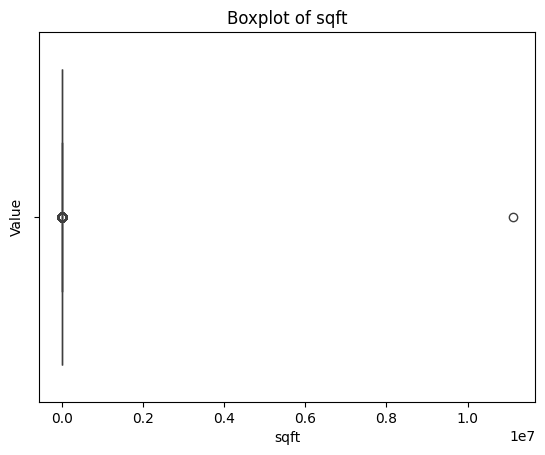

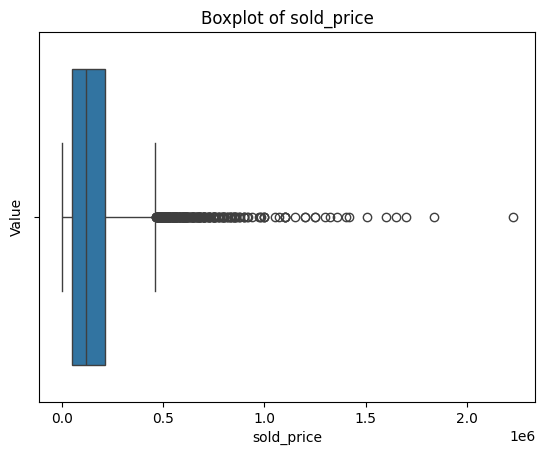

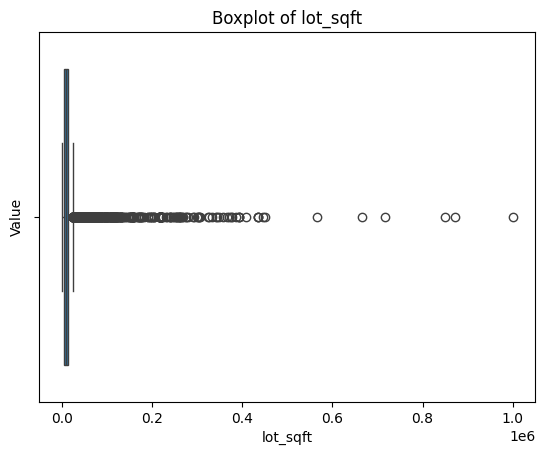

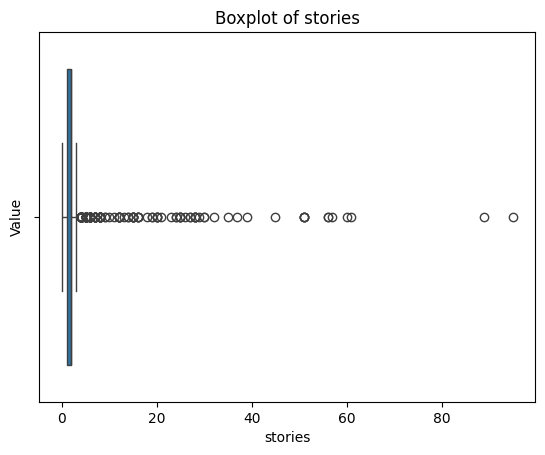

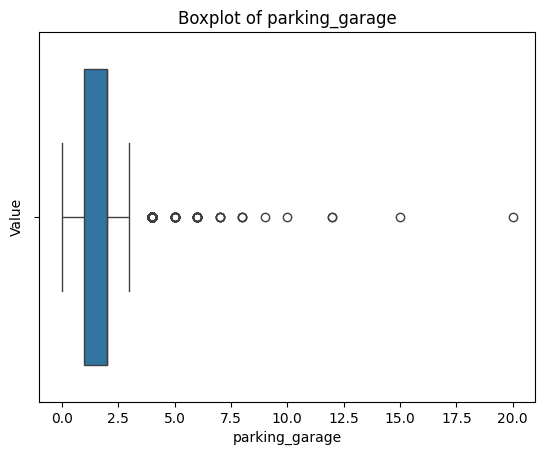

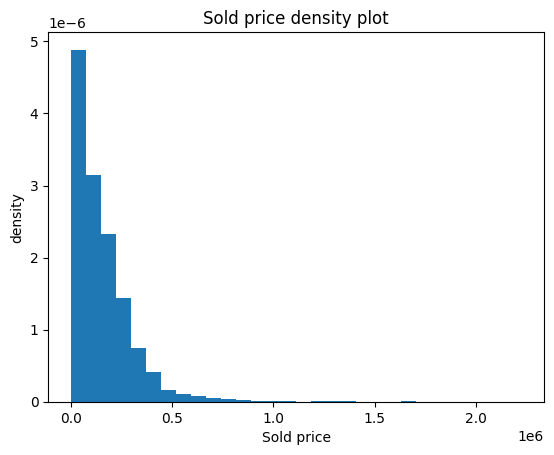

In [8]:
# outliers
ourliers_col = ['sqft', 'sold_price', 'lot_sqft', 'stories', 'parking_garage']
# remove the outliers

for col in ourliers_col:
    sns.boxplot(x=il_housing[col])
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {col}')
    plt.show()
il_housing = il_housing[il_housing['sqft'] < 10000000]
# il_housing = il_housing[il_housing['sold_price'] < 2000000]
# il_housing = il_housing[il_housing['lot_sqft'] < 200000]
# il_housing = il_housing[il_housing['stories'] < 60]
il_housing = il_housing[il_housing['parking_garage'] < 10]
plt.hist(il_housing['sold_price'], bins = 30, density = True, label = 'True Sold price')
plt.xlabel('Sold price')
plt.ylabel('density')
plt.title('Sold price density plot')
plt.show()

In [9]:
# train a linear model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_features = ['style', 'beds', 'full_baths', 'half_baths', 'sqft', 'year_built', 'sold_price', 'lot_sqft', 'county', 'stories', 'parking_garage', 'latitude', 'longitude']

il_lm = il_housing[housing_features]
unique_county = il_housing['county'].unique()
print(unique_county)
unique_style = il_housing['style'].unique()
print(unique_style)

['McHenry' 'Cook' 'DeKalb' 'Madison' 'Kane' 'Lake' 'St. Clair' 'DuPage'
 'Vermilion' 'Logan' 'Bond' 'Will' 'McLean' 'Grundy' 'Whiteside'
 'Tazewell' 'Kankakee' 'Henry' 'LaSalle' 'Champaign' 'Macon' 'Fulton'
 'Christian' 'Montgomery' 'Marion' 'Lee' 'Coles' 'Clinton' 'Edgar'
 'Douglas' 'Peoria' 'Effingham' 'Pike' 'Kendall' 'Iroquois' 'Stephenson'
 'Winnebago' 'De Witt' 'Carroll' 'Crawford' 'Randolph' 'Fayette' 'Clark'
 'Macoupin' 'Franklin' 'Jersey' 'Sangamon' 'Ford' 'Marshall' 'Clay'
 'Bureau' 'Adams' 'Livingston' 'Shelby' 'Boone' 'Ogle' 'Williamson'
 'Washington' 'Lawrence' 'Cumberland' 'Jo Daviess' 'Rock Island'
 'Richland' 'Monroe' 'Morgan' 'Woodford' 'Jackson' 'McDonough' 'Putnam'
 'Piatt' 'Wabash' 'Mason' 'Hancock' 'Jasper' 'Moultrie' 'Massac' 'Greene'
 'Saline' 'Perry' 'Johnson' 'Warren' 'Knox' 'Union' 'Henderson' 'White'
 'Jefferson' 'Edwards' 'Gallatin' 'Scott' 'Brown' 'Schuyler' 'Stark'
 'Calhoun']
['SINGLE_FAMILY' 'TOWNHOMES' 'MULTI_FAMILY' 'CONDOS' 'MOBILE' 'LAND'
 'CONDO_TOW

For numerical data, we did the standardization; for categorical data, we did the one-hot encoding.

(6505, 12)
(1627, 12)
(6505,)
(1627,)
Mean Squared Error: 0.4386127334439359
R-squared: 0.6191941096979394


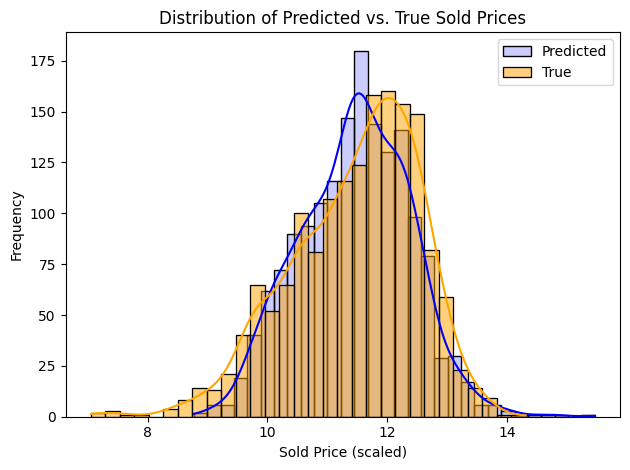

In [10]:
# linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
X, y = il_lm.drop('sold_price', axis=1), il_lm['sold_price']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
# standardized y:
y = np.log1p(y)
# numerical data & categorical data
preprocessor = ColumnTransformer(transformers=[
    ('num', 'passthrough', numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Full pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape) #(3642, 12)
print(X_test.shape) # (911, 12)
print(y_train.shape) # (3642,)
print(y_test.shape) # (911,)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
sns.histplot(y_pred, bins=30, color='blue', alpha=0.2, kde=True, label='Predicted')
sns.histplot(y_test, bins=30, color='orange', alpha=0.5, kde=True, label='True')

plt.title('Distribution of Predicted vs. True Sold Prices')
plt.xlabel('Sold Price (scaled)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

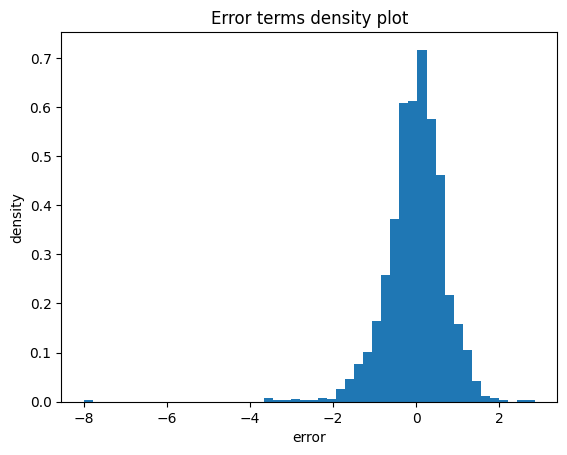

In [48]:
error = y_test - y_pred
plt.hist(error, bins = 50, density = True, label='linear model error')
plt.xlabel('error')
plt.ylabel('density')
plt.title('Error terms density plot')
plt.show()

In [10]:
# tune the linear model with L1 and L2 norm.
lasso = LassoCV(cv=5, random_state=42)
lasso_pipline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', lasso)
])
lasso_pipline.fit(X_train, y_train)
y_pred_lasso = lasso_pipline.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Loss:", mse_lasso)
r2_lasso = lasso_pipline.score(X_test, y_test)
print(f'R-squared: {r2_lasso}')
# 3. L2 Regularization (Ridge)
ridge = RidgeCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5)
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', ridge)
])
ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = ridge_pipeline.score(X_test, y_test)

print("Ridge Loss:", mse_ridge)
print(f'R-squared: {r2_ridge}')

Lasso Loss: 0.7766764795478706
R-squared: 0.3546191348675899
Ridge Loss: 0.4512949724790106
R-squared: 0.6249955452005427


The results showed that Lasso regression and Ridge regression didn't improve the final results, after dropping the outliers within the features.

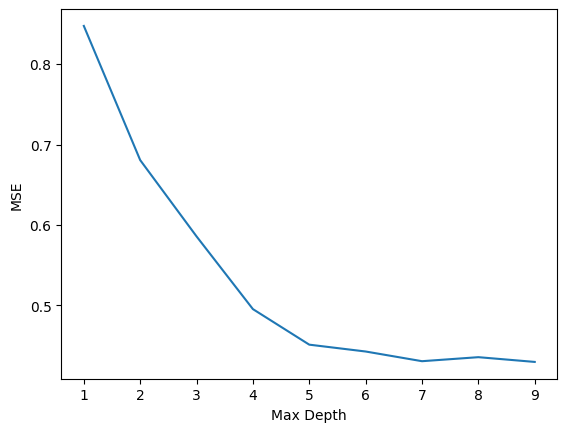

Decision Tree Loss: 0.429599185272267


In [11]:
# Decision Trees:
from sklearn.tree import DecisionTreeRegressor, plot_tree
max_depth_scores = {}
for i in range(1, 10):
    tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=i, random_state=0))  # keep depth small for easy visualization
])
    tree_pipeline.fit(X_train, y_train)
    y_pred_tree = tree_pipeline.predict(X_test)
    mse_tree = mean_squared_error(y_test, y_pred_tree)
    r2_tree = tree_pipeline.score(X_test, y_test)
    max_depth_scores[i] = mse_tree
plt.plot(list(max_depth_scores.keys()), list(max_depth_scores.values()))
plt.xlabel('Max Depth')
plt.ylabel('MSE')
plt.show()
print("Decision Tree Loss:", mse_tree) # this means 6 is the best one, so we chose the max_depth = 6
# Get the trained decision tree from the pipeline
tree_model= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=6, random_state=0))  # keep depth small for easy visualization
])
tree_model.fit(X_train, y_train)
fitted_tree = tree_model.named_steps['regressor']
feature_names = tree_model.named_steps['preprocessor'].get_feature_names_out()

In [51]:
!brew install graphviz


zsh:1: command not found: brew


In [49]:
from sklearn.tree import export_graphviz
import graphviz
# graphviz can be used for clean and publication-quality visualizations of decision trees
# and it is much better than plot_tree().

dot_data = export_graphviz(
    fitted_tree,
    out_file=None,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    proportion=False,
    impurity=False,
    precision=2,
)
dot_data_with_size = dot_data.replace('graph [', 'graph [size="50,15!", ') if 'graph [' in dot_data else dot_data.replace('digraph Tree {', 'digraph Tree {\nsize="50,15!";')
graph = graphviz.Source(dot_data_with_size)
graph.render("data/decision_tree", format = 'png', cleanup=True)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

Random Forest Part

In [14]:
# same dataset
from sklearn.ensemble import RandomForestRegressor
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=0))
])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = rf_pipeline.score(X_test, y_test)
print(f'R-squared: {r2_rf}')
print("Random Forest MSE Loss:", mse_rf)

R-squared: 0.7490017082648108
Random Forest MSE Loss: 0.30206112410447766


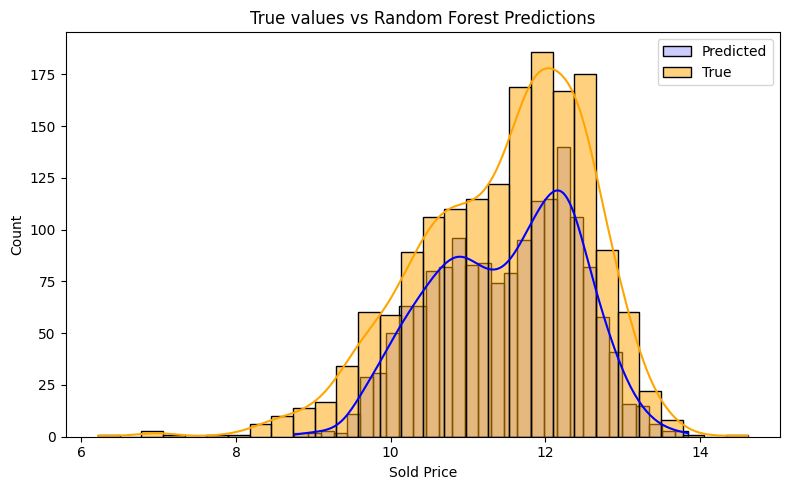

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(y_pred_rf, bins=30, color='blue', alpha=0.2, kde=True, label='Predicted')
sns.histplot(y_test, bins=30, color='orange', alpha=0.5, kde=True, label='True')

plt.title('True values vs Random Forest Predictions')
plt.xlabel('Sold Price')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


The plot shows that the predicted sold price of the random forest results are more concentrated than the true values.

In [16]:
# change the parameters
n_estimators_sets = [50, 100, 200]
max_depth_sets = [None, 10, 20, 30]

for n_estimators in n_estimators_sets:
    for max_depth in max_depth_sets:
        rf_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', RandomForestRegressor(n_estimators=n_estimators, max_depth = max_depth, random_state=0))
        ])
        rf_pipeline.fit(X_train, y_train)
        y_pred_rf = rf_pipeline.predict(X_test)
        mse_rf = mean_squared_error(y_test, y_pred_rf)
        print(f"n_estimators: {n_estimators}, max_depth: {max_depth}")
        print("Random Forest MSE Loss:", mse_rf)


n_estimators: 50, max_depth: None
Random Forest MSE Loss: 0.3041388951341634
n_estimators: 50, max_depth: 10
Random Forest MSE Loss: 0.3236665197334554
n_estimators: 50, max_depth: 20
Random Forest MSE Loss: 0.30662146966300446
n_estimators: 50, max_depth: 30
Random Forest MSE Loss: 0.30489641845492427
n_estimators: 100, max_depth: None
Random Forest MSE Loss: 0.30206112410447766
n_estimators: 100, max_depth: 10
Random Forest MSE Loss: 0.32343237909050726
n_estimators: 100, max_depth: 20
Random Forest MSE Loss: 0.3039039904936307
n_estimators: 100, max_depth: 30
Random Forest MSE Loss: 0.30319593228727876
n_estimators: 200, max_depth: None
Random Forest MSE Loss: 0.30042138546120845
n_estimators: 200, max_depth: 10
Random Forest MSE Loss: 0.3226204061058926
n_estimators: 200, max_depth: 20
Random Forest MSE Loss: 0.3016929127212528
n_estimators: 200, max_depth: 30
Random Forest MSE Loss: 0.3010013266859462


Based on the current results, you can see the best results is when n_estimators = 200 and max_depth = 10, so I think this is

In [11]:
preprocessor.fit(X_train)
# only fit in the training set not in the test set.
X_train_transformed = preprocessor.transform(X_train).toarray()
X_test_transformed = preprocessor.transform(X_test).toarray()
y_train_transformed = np.array(y_train)
y_test_transformed = np.array(y_test)
print(X_train_transformed.shape)
print(X_test_transformed.shape)
print(y_train_transformed.shape)
print(type(y_test_transformed[1]))
# type(X_train)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

# X_test = preprocessor.transform(X_test)

(6505, 2208)
(1627, 2208)
(6505,)
<class 'numpy.float64'>


Epoch [1/100], Loss: 68.8239
Epoch [2/100], Loss: 17.0219
Epoch [3/100], Loss: 3.4969
Epoch [4/100], Loss: 1.3375
Epoch [5/100], Loss: 1.1077
Epoch [6/100], Loss: 1.0924
Epoch [7/100], Loss: 1.0919
Epoch [8/100], Loss: 1.0920
Epoch [9/100], Loss: 1.0919
Epoch [10/100], Loss: 1.0920
Epoch [11/100], Loss: 1.0921
Epoch [12/100], Loss: 1.0922
Epoch [13/100], Loss: 1.0921
Epoch [14/100], Loss: 1.0920
Epoch [15/100], Loss: 1.0921
Epoch [16/100], Loss: 1.0920
Epoch [17/100], Loss: 1.0923
Epoch [18/100], Loss: 1.0921
Epoch [19/100], Loss: 1.0922
Epoch [20/100], Loss: 1.0921
Epoch [21/100], Loss: 1.0924
Epoch [22/100], Loss: 1.0924
Epoch [23/100], Loss: 1.0923
Epoch [24/100], Loss: 1.0927
Epoch [25/100], Loss: 1.0927
Epoch [26/100], Loss: 1.0925
Epoch [27/100], Loss: 1.0926
Epoch [28/100], Loss: 1.0927
Epoch [29/100], Loss: 1.0923
Epoch [30/100], Loss: 1.0925
Epoch [31/100], Loss: 1.0924
Epoch [32/100], Loss: 1.0925
Epoch [33/100], Loss: 1.0925
Epoch [34/100], Loss: 1.0931
Epoch [35/100], Loss:

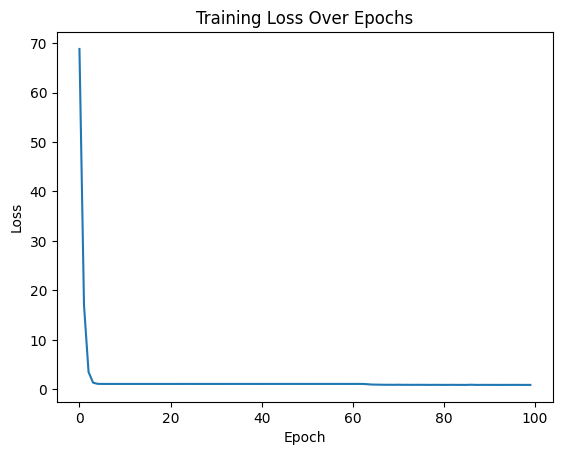

In [18]:
# Neural Networks
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
class MLPRegressor(nn.Module):
     def __init__(self, input_size, hidden_size, output_size):
          super().__init__()
          self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Sigmoid(),
            nn.Linear(hidden_size, output_size)
        )
     def forward(self, x):
          return self.model(x)

def train_model(model, train_loader, criterion, optimizer, num_epochs):
    epoch_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_losses.append(epoch_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Avg Loss: {epoch_loss:.4f}')

    return epoch_losses
# We can't input the numpy file to the dataloader, so we changed it into the tensor file first
# transform into float32, because torch only support float32 type.
X_train_tensor = torch.tensor(X_train_transformed.astype(np.float32))
X_test_tensor = torch.tensor(X_test_transformed.astype(np.float32))
y_train_tensor = torch.tensor(y_train_transformed.astype(np.float32)).view(-1, 1)
y_test_tensor = torch.tensor(y_test_transformed.astype(np.float32)).view(-1, 1)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

def train_model(model, dataloader, criterion, optimizer, num_epochs):
    losses = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(dataloader.dataset)
        losses.append(epoch_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
    return losses
model = MLPRegressor(input_size=X_train_tensor.shape[1], hidden_size=64, output_size=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 100
losses = train_model(model, train_loader, criterion, optimizer, num_epochs)
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    mse_nn = criterion(y_pred_tensor, y_test_tensor)
print("Neural Network MSE Loss:", mse_nn.item())
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

# y_pred_original = y_scaler.inverse_transform(y_pred_tensor.numpy())

Epoch [1/100], Loss: 0.0228
Epoch [2/100], Loss: 0.0088
Epoch [3/100], Loss: 0.0070
Epoch [4/100], Loss: 0.0060
Epoch [5/100], Loss: 0.0054
Epoch [6/100], Loss: 0.0050
Epoch [7/100], Loss: 0.0047
Epoch [8/100], Loss: 0.0046
Epoch [9/100], Loss: 0.0045
Epoch [10/100], Loss: 0.0044
Epoch [11/100], Loss: 0.0043
Epoch [12/100], Loss: 0.0042
Epoch [13/100], Loss: 0.0042
Epoch [14/100], Loss: 0.0041
Epoch [15/100], Loss: 0.0041
Epoch [16/100], Loss: 0.0041
Epoch [17/100], Loss: 0.0042
Epoch [18/100], Loss: 0.0041
Epoch [19/100], Loss: 0.0041
Epoch [20/100], Loss: 0.0040
Epoch [21/100], Loss: 0.0040
Epoch [22/100], Loss: 0.0040
Epoch [23/100], Loss: 0.0041
Epoch [24/100], Loss: 0.0041
Epoch [25/100], Loss: 0.0041
Epoch [26/100], Loss: 0.0041
Epoch [27/100], Loss: 0.0040
Epoch [28/100], Loss: 0.0040
Epoch [29/100], Loss: 0.0041
Epoch [30/100], Loss: 0.0041
Epoch [31/100], Loss: 0.0040
Epoch [32/100], Loss: 0.0040
Epoch [33/100], Loss: 0.0041
Epoch [34/100], Loss: 0.0041
Epoch [35/100], Loss: 0

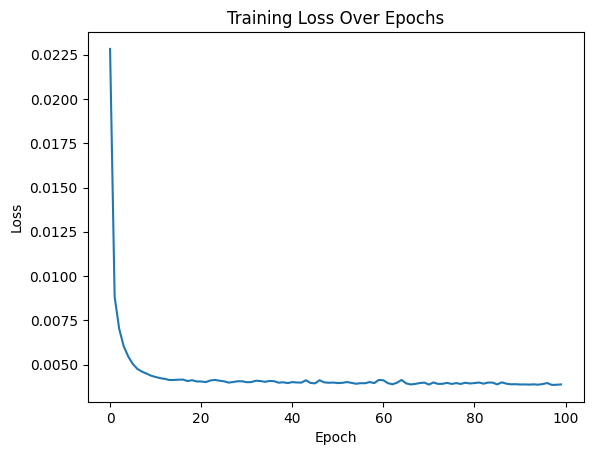

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Normalize features and targets
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_norm = scaler_X.fit_transform(X_train_transformed)
X_test_norm = scaler_X.transform(X_test_transformed)
y_train_norm = scaler_y.fit_transform(y_train_transformed.reshape(-1, 1))
y_test_norm = scaler_y.transform(y_test_transformed.reshape(-1, 1))

# Convert to tensors
X_train_tensor = torch.tensor(X_train_norm.astype(np.float32))
X_test_tensor = torch.tensor(X_test_norm.astype(np.float32))
y_train_tensor = torch.tensor(y_train_norm.astype(np.float32))
y_test_tensor = torch.tensor(y_test_norm.astype(np.float32))

# Dataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define MLP model
class MLPRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Sigmoid(),
            nn.Linear(hidden_size, output_size)
        )
    def forward(self, x):
        return self.model(x)

# Training function
def train_model(model, dataloader, criterion, optimizer, num_epochs):
    losses = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(dataloader.dataset)
        losses.append(epoch_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
    return losses

# Model setup
model = MLPRegressor(input_size=X_train_tensor.shape[1], hidden_size=64, output_size=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 100

# Train the model
losses = train_model(model, train_loader, criterion, optimizer, num_epochs)

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    mse_nn = criterion(y_pred_tensor, y_test_tensor)

print("Neural Network MSE Loss (normalized):", mse_nn.item())

# Plot training loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

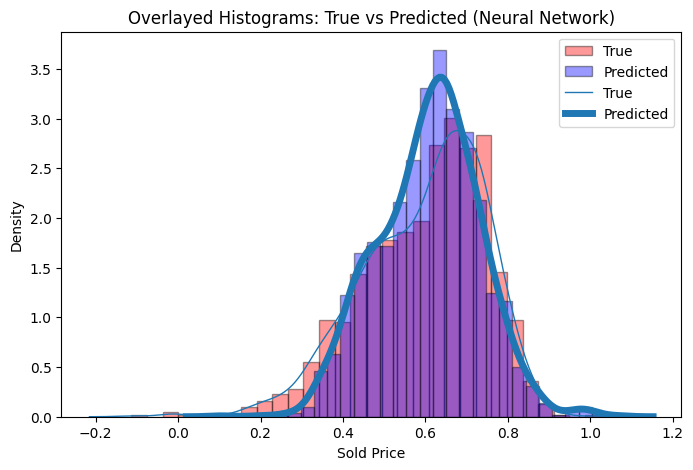

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = y_pred_tensor.detach().cpu().numpy()
y_true = y_test_tensor.detach().cpu().numpy()

plt.figure(figsize=(8, 5))

plt.hist(y_true, label='True', density = True, color='red', bins=30, alpha=0.4, edgecolor='black')
plt.hist(y_pred, label='Predicted', density = True, color='blue', bins=30, alpha=0.4, edgecolor='black')
sns.kdeplot(y_true, color='red', label='True', linewidth=1)
sns.kdeplot(y_pred, color='blue', label='Predicted', linewidth=5)
plt.grid(False)
plt.title('Overlayed Histograms: True vs Predicted (Neural Network)')
plt.xlabel('Sold Price')
plt.ylabel('Density')
plt.legend()
# plt .tight_layout()
plt.show()


In [21]:
# and I chose to change into the shuffle = False and did it again
import random
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
set_seed(123)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
losses = train_model(model, train_loader, criterion, optimizer, num_epochs)
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    mse_nn = criterion(y_pred_tensor, y_test_tensor)
print("Neural Network MSE Loss:", mse_nn.item())

Epoch [1/100], Loss: 0.0050
Epoch [2/100], Loss: 0.0049
Epoch [3/100], Loss: 0.0048
Epoch [4/100], Loss: 0.0049
Epoch [5/100], Loss: 0.0049
Epoch [6/100], Loss: 0.0049
Epoch [7/100], Loss: 0.0049
Epoch [8/100], Loss: 0.0048
Epoch [9/100], Loss: 0.0049
Epoch [10/100], Loss: 0.0049
Epoch [11/100], Loss: 0.0049
Epoch [12/100], Loss: 0.0048
Epoch [13/100], Loss: 0.0049
Epoch [14/100], Loss: 0.0049
Epoch [15/100], Loss: 0.0049
Epoch [16/100], Loss: 0.0048
Epoch [17/100], Loss: 0.0049
Epoch [18/100], Loss: 0.0049
Epoch [19/100], Loss: 0.0049
Epoch [20/100], Loss: 0.0049
Epoch [21/100], Loss: 0.0048
Epoch [22/100], Loss: 0.0048
Epoch [23/100], Loss: 0.0048
Epoch [24/100], Loss: 0.0049
Epoch [25/100], Loss: 0.0048
Epoch [26/100], Loss: 0.0048
Epoch [27/100], Loss: 0.0049
Epoch [28/100], Loss: 0.0048
Epoch [29/100], Loss: 0.0048
Epoch [30/100], Loss: 0.0049
Epoch [31/100], Loss: 0.0048
Epoch [32/100], Loss: 0.0048
Epoch [33/100], Loss: 0.0048
Epoch [34/100], Loss: 0.0048
Epoch [35/100], Loss: 0

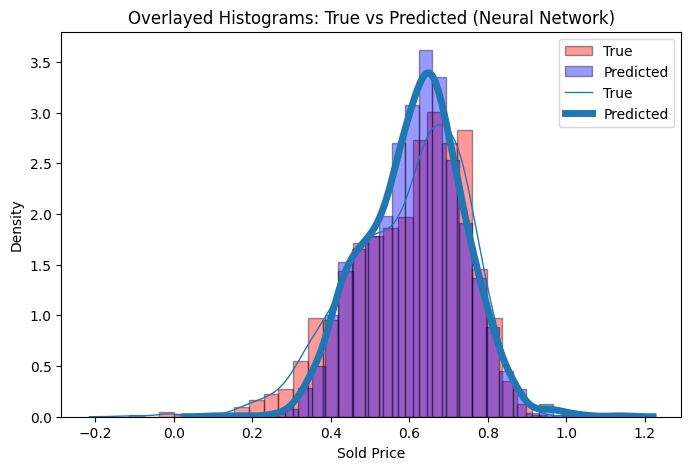

In [22]:
y_pred = y_pred_tensor.detach().cpu().numpy()
y_true = y_test_tensor.detach().cpu().numpy()

plt.figure(figsize=(8, 5))

plt.hist(y_true, label='True', density = True, color='red', bins=30, alpha=0.4, edgecolor='black')
plt.hist(y_pred, label='Predicted', density = True, color='blue', bins=30, alpha=0.4, edgecolor='black')
sns.kdeplot(y_true, color='red', label='True', linewidth=1)
sns.kdeplot(y_pred, color='blue', label='Predicted', linewidth=5)
plt.grid(False)
plt.title('Overlayed Histograms: True vs Predicted (Neural Network)')
plt.xlabel('Sold Price')
plt.ylabel('Density')
plt.legend()
# plt .tight_layout()
plt.show()

Epoch [1/100], Loss: 0.0046
Epoch [2/100], Loss: 0.0045
Epoch [3/100], Loss: 0.0045
Epoch [4/100], Loss: 0.0045
Epoch [5/100], Loss: 0.0045
Epoch [6/100], Loss: 0.0045
Epoch [7/100], Loss: 0.0044
Epoch [8/100], Loss: 0.0045
Epoch [9/100], Loss: 0.0045
Epoch [10/100], Loss: 0.0044
Epoch [11/100], Loss: 0.0044
Epoch [12/100], Loss: 0.0044
Epoch [13/100], Loss: 0.0044
Epoch [14/100], Loss: 0.0044
Epoch [15/100], Loss: 0.0045
Epoch [16/100], Loss: 0.0044
Epoch [17/100], Loss: 0.0045
Epoch [18/100], Loss: 0.0044
Epoch [19/100], Loss: 0.0043
Epoch [20/100], Loss: 0.0045
Epoch [21/100], Loss: 0.0043
Epoch [22/100], Loss: 0.0043
Epoch [23/100], Loss: 0.0044
Epoch [24/100], Loss: 0.0043
Epoch [25/100], Loss: 0.0043
Epoch [26/100], Loss: 0.0043
Epoch [27/100], Loss: 0.0043
Epoch [28/100], Loss: 0.0043
Epoch [29/100], Loss: 0.0043
Epoch [30/100], Loss: 0.0042
Epoch [31/100], Loss: 0.0042
Epoch [32/100], Loss: 0.0043
Epoch [33/100], Loss: 0.0042
Epoch [34/100], Loss: 0.0042
Epoch [35/100], Loss: 0

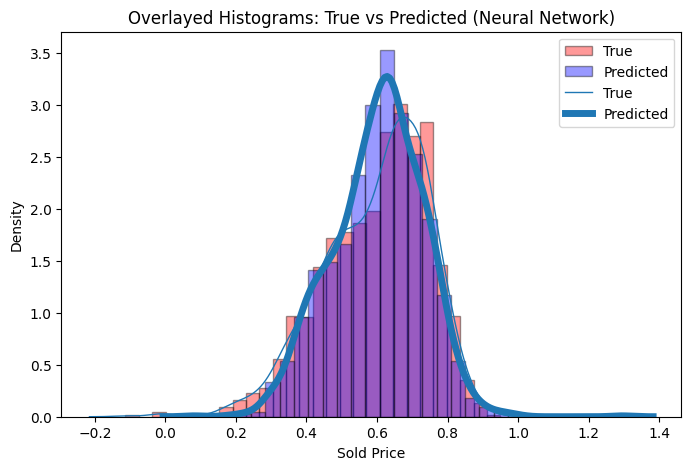

In [23]:
set_seed(1234)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
losses = train_model(model, train_loader, criterion, optimizer, num_epochs)
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    mse_nn = criterion(y_pred_tensor, y_test_tensor)
print("Neural Network MSE Loss:", mse_nn.item())
y_pred = y_pred_tensor.detach().cpu().numpy()
y_true = y_test_tensor.detach().cpu().numpy()

plt.figure(figsize=(8, 5))

plt.hist(y_true, label='True', density = True, color='red', bins=30, alpha=0.4, edgecolor='black')
plt.hist(y_pred, label='Predicted', density = True, color='blue', bins=30, alpha=0.4, edgecolor='black')
sns.kdeplot(y_true, color='red', label='True', linewidth=1)
sns.kdeplot(y_pred, color='blue', label='Predicted', linewidth=5)
plt.grid(False)
plt.title('Overlayed Histograms: True vs Predicted (Neural Network)')
plt.xlabel('Sold Price')
plt.ylabel('Density')
plt.legend()
# plt .tight_layout()
plt.show()

Epoch [1/100], Loss: 0.0224
Epoch [2/100], Loss: 0.0064
Epoch [3/100], Loss: 0.0051
Epoch [4/100], Loss: 0.0044
Epoch [5/100], Loss: 0.0039
Epoch [6/100], Loss: 0.0036
Epoch [7/100], Loss: 0.0034
Epoch [8/100], Loss: 0.0032
Epoch [9/100], Loss: 0.0030
Epoch [10/100], Loss: 0.0029
Epoch [11/100], Loss: 0.0029
Epoch [12/100], Loss: 0.0028
Epoch [13/100], Loss: 0.0028
Epoch [14/100], Loss: 0.0027
Epoch [15/100], Loss: 0.0027
Epoch [16/100], Loss: 0.0026
Epoch [17/100], Loss: 0.0026
Epoch [18/100], Loss: 0.0026
Epoch [19/100], Loss: 0.0026
Epoch [20/100], Loss: 0.0026
Epoch [21/100], Loss: 0.0026
Epoch [22/100], Loss: 0.0026
Epoch [23/100], Loss: 0.0026
Epoch [24/100], Loss: 0.0026
Epoch [25/100], Loss: 0.0026
Epoch [26/100], Loss: 0.0026
Epoch [27/100], Loss: 0.0026
Epoch [28/100], Loss: 0.0026
Epoch [29/100], Loss: 0.0026
Epoch [30/100], Loss: 0.0026
Epoch [31/100], Loss: 0.0026
Epoch [32/100], Loss: 0.0026
Epoch [33/100], Loss: 0.0025
Epoch [34/100], Loss: 0.0025
Epoch [35/100], Loss: 0

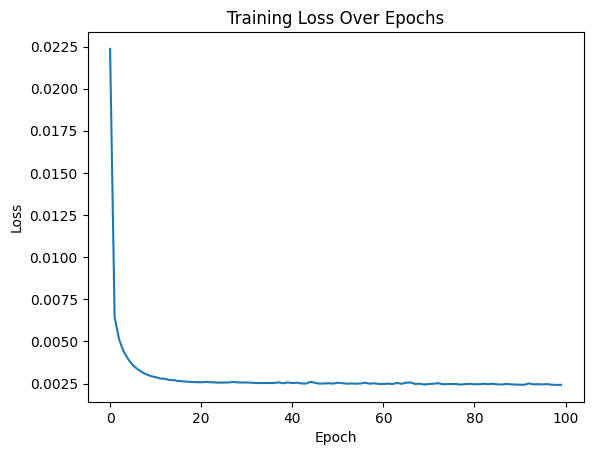

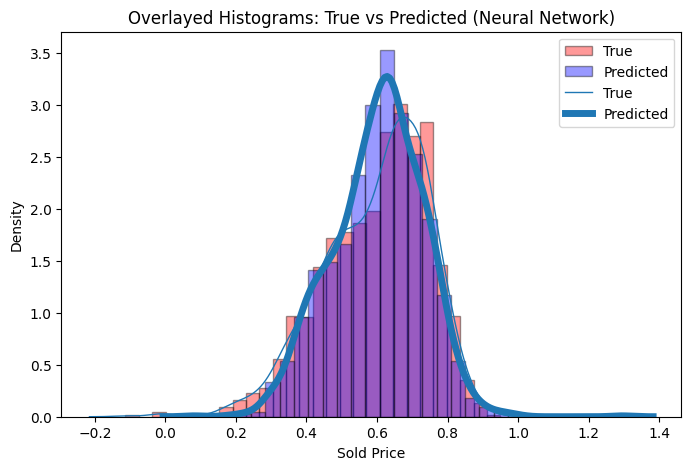

In [24]:
model = MLPRegressor(input_size=X_train_tensor.shape[1], hidden_size=64, output_size=1)
criterion = nn.HuberLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 100

# Train the model
losses = train_model(model, train_loader, criterion, optimizer, num_epochs)

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    mse_nn = criterion(y_pred_tensor, y_test_tensor)

print("Neural Network MSE Loss (normalized):", mse_nn.item())

# Plot training loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()
# histogram
plt.figure(figsize=(8, 5))

plt.hist(y_true, label='True', density = True, color='red', bins=30, alpha=0.4, edgecolor='black')
plt.hist(y_pred, label='Predicted', density = True, color='blue', bins=30, alpha=0.4, edgecolor='black')
sns.kdeplot(y_true, color='red', label='True', linewidth=1)
sns.kdeplot(y_pred, color='blue', label='Predicted', linewidth=5)
plt.grid(False)
plt.title('Overlayed Histograms: True vs Predicted (Neural Network)')
plt.xlabel('Sold Price')
plt.ylabel('Density')
plt.legend()
# plt .tight_layout()
plt.show()

In [25]:
pip install -U seaborn

Note: you may need to restart the kernel to use updated packages.


Change optimizer, the number of layers in the net, and the activation functions you use.

Overfitting problems: when there is no dropout here.

In [26]:
class MLPRegressor(nn.Module):
     def __init__(self, input_size, hidden_size, output_size):
          super().__init__()
          self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )
     def forward(self, x):
          return self.model(x)

def train_model(model, train_loader, criterion, optimizer, num_epochs):
    epoch_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_losses.append(epoch_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Avg Loss: {epoch_loss:.4f}')

    return epoch_losses
model = MLPRegressor(input_size=X_train_tensor.shape[1], hidden_size=64, output_size=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 100
losses = train_model(model, train_loader, criterion, optimizer, num_epochs)
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    mse_nn = criterion(y_pred_tensor, y_test_tensor)
print("Neural Network MSE Loss:", mse_nn.item())

Epoch [1/100], Avg Loss: 0.0602
Epoch [2/100], Avg Loss: 0.0081
Epoch [3/100], Avg Loss: 0.0067
Epoch [4/100], Avg Loss: 0.0061
Epoch [5/100], Avg Loss: 0.0058
Epoch [6/100], Avg Loss: 0.0056
Epoch [7/100], Avg Loss: 0.0055
Epoch [8/100], Avg Loss: 0.0054
Epoch [9/100], Avg Loss: 0.0054
Epoch [10/100], Avg Loss: 0.0054
Epoch [11/100], Avg Loss: 0.0054
Epoch [12/100], Avg Loss: 0.0053
Epoch [13/100], Avg Loss: 0.0053
Epoch [14/100], Avg Loss: 0.0053
Epoch [15/100], Avg Loss: 0.0053
Epoch [16/100], Avg Loss: 0.0052
Epoch [17/100], Avg Loss: 0.0052
Epoch [18/100], Avg Loss: 0.0051
Epoch [19/100], Avg Loss: 0.0050
Epoch [20/100], Avg Loss: 0.0050
Epoch [21/100], Avg Loss: 0.0048
Epoch [22/100], Avg Loss: 0.0047
Epoch [23/100], Avg Loss: 0.0047
Epoch [24/100], Avg Loss: 0.0047
Epoch [25/100], Avg Loss: 0.0046
Epoch [26/100], Avg Loss: 0.0046
Epoch [27/100], Avg Loss: 0.0046
Epoch [28/100], Avg Loss: 0.0046
Epoch [29/100], Avg Loss: 0.0045
Epoch [30/100], Avg Loss: 0.0045
Epoch [31/100], Avg

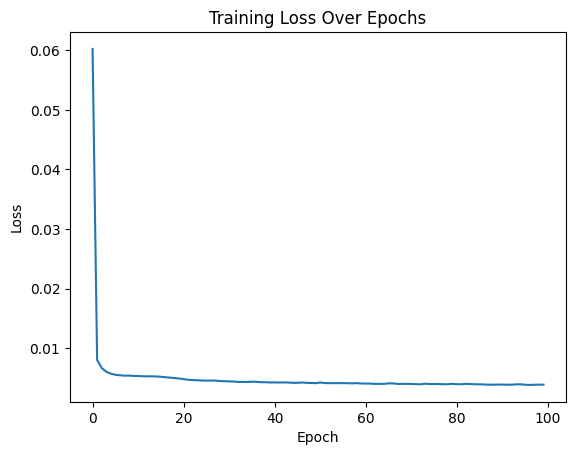

In [27]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

In [28]:
class MLPRegressor(nn.Module):
     def __init__(self, input_size, hidden_size, output_size):
          super().__init__()
          self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )
     def forward(self, x):
          return self.model(x)

def train_model(model, train_loader, criterion, optimizer, num_epochs):
    epoch_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_losses.append(epoch_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Avg Loss: {epoch_loss:.4f}')

    return epoch_losses
model = MLPRegressor(input_size=X_train_tensor.shape[1], hidden_size=64, output_size=1)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
num_epochs = 100
losses = train_model(model, train_loader, criterion, optimizer, num_epochs)
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    mse_nn = criterion(y_pred_tensor, y_test_tensor)
print("Neural Network MSE Loss:", mse_nn.item())

Epoch [1/100], Avg Loss: 0.0552
Epoch [2/100], Avg Loss: 0.0080
Epoch [3/100], Avg Loss: 0.0067
Epoch [4/100], Avg Loss: 0.0061
Epoch [5/100], Avg Loss: 0.0057
Epoch [6/100], Avg Loss: 0.0056
Epoch [7/100], Avg Loss: 0.0054
Epoch [8/100], Avg Loss: 0.0054
Epoch [9/100], Avg Loss: 0.0054
Epoch [10/100], Avg Loss: 0.0053
Epoch [11/100], Avg Loss: 0.0053
Epoch [12/100], Avg Loss: 0.0053
Epoch [13/100], Avg Loss: 0.0052
Epoch [14/100], Avg Loss: 0.0052
Epoch [15/100], Avg Loss: 0.0052
Epoch [16/100], Avg Loss: 0.0052
Epoch [17/100], Avg Loss: 0.0051
Epoch [18/100], Avg Loss: 0.0051
Epoch [19/100], Avg Loss: 0.0051
Epoch [20/100], Avg Loss: 0.0050
Epoch [21/100], Avg Loss: 0.0050
Epoch [22/100], Avg Loss: 0.0049
Epoch [23/100], Avg Loss: 0.0048
Epoch [24/100], Avg Loss: 0.0048
Epoch [25/100], Avg Loss: 0.0048
Epoch [26/100], Avg Loss: 0.0047
Epoch [27/100], Avg Loss: 0.0048
Epoch [28/100], Avg Loss: 0.0047
Epoch [29/100], Avg Loss: 0.0046
Epoch [30/100], Avg Loss: 0.0046
Epoch [31/100], Avg

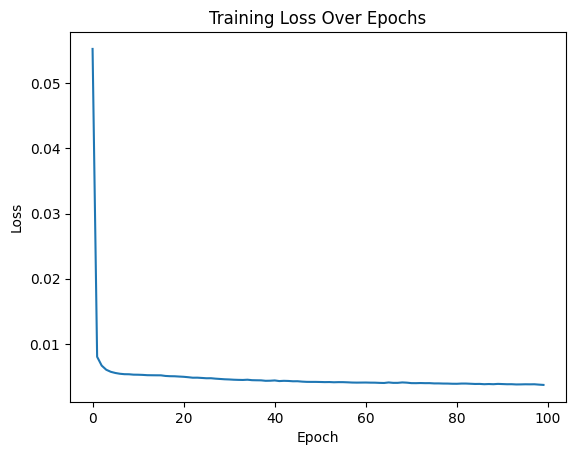

In [29]:
plt.grid(False)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

Epoch [1/100], Avg Loss: 0.0193
Epoch [2/100], Avg Loss: 0.0142
Epoch [3/100], Avg Loss: 0.0097
Epoch [4/100], Avg Loss: 0.0080
Epoch [5/100], Avg Loss: 0.0073
Epoch [6/100], Avg Loss: 0.0065
Epoch [7/100], Avg Loss: 0.0064
Epoch [8/100], Avg Loss: 0.0061
Epoch [9/100], Avg Loss: 0.0059
Epoch [10/100], Avg Loss: 0.0057
Epoch [11/100], Avg Loss: 0.0057
Epoch [12/100], Avg Loss: 0.0056
Epoch [13/100], Avg Loss: 0.0056
Epoch [14/100], Avg Loss: 0.0053
Epoch [15/100], Avg Loss: 0.0053
Epoch [16/100], Avg Loss: 0.0054
Epoch [17/100], Avg Loss: 0.0054
Epoch [18/100], Avg Loss: 0.0052
Epoch [19/100], Avg Loss: 0.0053
Epoch [20/100], Avg Loss: 0.0052
Epoch [21/100], Avg Loss: 0.0053
Epoch [22/100], Avg Loss: 0.0052
Epoch [23/100], Avg Loss: 0.0054
Epoch [24/100], Avg Loss: 0.0052
Epoch [25/100], Avg Loss: 0.0051
Epoch [26/100], Avg Loss: 0.0051
Epoch [27/100], Avg Loss: 0.0051
Epoch [28/100], Avg Loss: 0.0051
Epoch [29/100], Avg Loss: 0.0051
Epoch [30/100], Avg Loss: 0.0053
Epoch [31/100], Avg

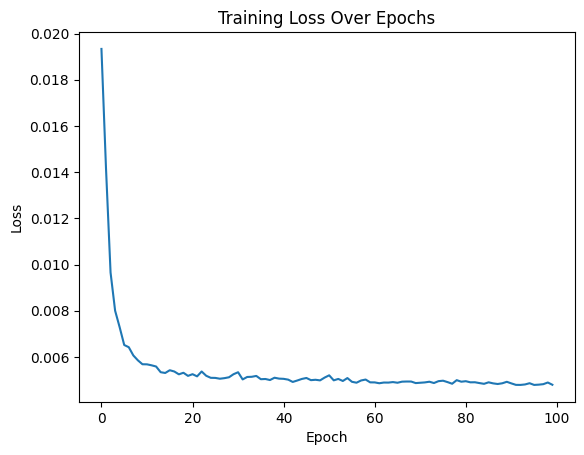

In [30]:
class MLPRegressor(nn.Module):
     def __init__(self, input_size, hidden_size, output_size):
          super().__init__()
          self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Sigmoid(),
            nn.Linear(hidden_size, hidden_size),
            nn.Sigmoid(),
            nn.Linear(hidden_size, output_size)
        )
     def forward(self, x):
          return self.model(x)

def train_model(model, train_loader, criterion, optimizer, num_epochs):
    epoch_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_losses.append(epoch_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Avg Loss: {epoch_loss:.4f}')

    return epoch_losses
model = MLPRegressor(input_size=X_train_tensor.shape[1], hidden_size=64, output_size=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 100
losses = train_model(model, train_loader, criterion, optimizer, num_epochs)
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    mse_nn = criterion(y_pred_tensor, y_test_tensor)
print("Neural Network MSE Loss:", mse_nn.item())
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

Epoch [1/100], Avg Loss: 0.0321
Epoch [2/100], Avg Loss: 0.0195
Epoch [3/100], Avg Loss: 0.0174
Epoch [4/100], Avg Loss: 0.0159
Epoch [5/100], Avg Loss: 0.0143
Epoch [6/100], Avg Loss: 0.0135
Epoch [7/100], Avg Loss: 0.0119
Epoch [8/100], Avg Loss: 0.0115
Epoch [9/100], Avg Loss: 0.0109
Epoch [10/100], Avg Loss: 0.0105
Epoch [11/100], Avg Loss: 0.0100
Epoch [12/100], Avg Loss: 0.0095
Epoch [13/100], Avg Loss: 0.0095
Epoch [14/100], Avg Loss: 0.0090
Epoch [15/100], Avg Loss: 0.0089
Epoch [16/100], Avg Loss: 0.0087
Epoch [17/100], Avg Loss: 0.0085
Epoch [18/100], Avg Loss: 0.0084
Epoch [19/100], Avg Loss: 0.0083
Epoch [20/100], Avg Loss: 0.0084
Epoch [21/100], Avg Loss: 0.0081
Epoch [22/100], Avg Loss: 0.0080
Epoch [23/100], Avg Loss: 0.0078
Epoch [24/100], Avg Loss: 0.0075
Epoch [25/100], Avg Loss: 0.0076
Epoch [26/100], Avg Loss: 0.0076
Epoch [27/100], Avg Loss: 0.0076
Epoch [28/100], Avg Loss: 0.0072
Epoch [29/100], Avg Loss: 0.0071
Epoch [30/100], Avg Loss: 0.0071
Epoch [31/100], Avg

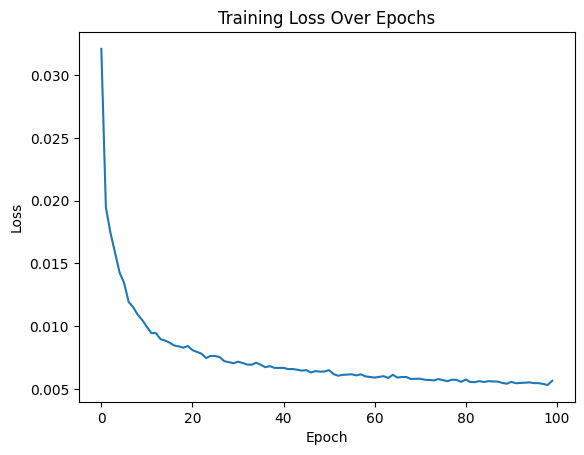

In [31]:
class MLPRegressor(nn.Module):
     def __init__(self, input_size, hidden_size, output_size):
          super().__init__()
          self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Sigmoid(),
            nn.Dropout(0.3),
            nn.Linear(hidden_size, hidden_size),
            nn.Sigmoid(),
            nn.Linear(hidden_size, output_size)
        )
     def forward(self, x):
          return self.model(x)

def train_model(model, train_loader, criterion, optimizer, num_epochs):
    epoch_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_losses.append(epoch_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Avg Loss: {epoch_loss:.4f}')

    return epoch_losses
model = MLPRegressor(input_size=X_train_tensor.shape[1], hidden_size=64, output_size=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 100
losses = train_model(model, train_loader, criterion, optimizer, num_epochs)
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    mse_nn = criterion(y_pred_tensor, y_test_tensor)
print("Neural Network MSE Loss:", mse_nn.item())
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

Actually adding the dropout layers and number of layers will increase your accuracy.

Visualization: with the original file

In [32]:
il_original = pd.read_csv('data/IL_housing_price.csv')
il_original.head()
sale_by_county = il_original.groupby('county')['sold_price'].mean().reset_index()
sale_by_county = sale_by_county.sort_values(by='sold_price', ascending=False)
sale_by_county.columns = ['county', 'sold_price']
df_avg = sale_by_county.copy()
df_avg.head()

,county,sold_price
19,DuPage,283871.889412
45,Lake,247044.762259
42,Kendall,222316.793478
40,Kane,219539.116041
58,McHenry,216100.309589


In [33]:
!pip install plotly



In [34]:
import json
import plotly.express as px

# Load the GeoJSON file containing geographic data for Illinois counties
with open('data/illinois-counties.geojson') as f:
    geojson_data = json.load(f)

# Assuming df_avg is a DataFrame that includes the average housing price for each county in Illinois
fig = px.choropleth(
    df_avg,  # DataFrame containing the average sold price for each county
    geojson=geojson_data,  # GeoJSON data
    locations="county",  # Column in df_avg that matches GeoJSON features
    featureidkey="properties.name",  # Path in GeoJSON to match with locations
    color="sold_price",  # Column in df_avg used to determine the color of the counties
    color_continuous_scale="Viridis",  # Color scale for the Choropleth map
    scope="usa",
    labels={"sold_price":"Average Sold Price"}  # Label for the color scale
)

# Update layout to minimize white space around the map
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
# Ensure that the map scales and centers correctly around the locations
fig.update_geos(fitbounds="locations", visible=True)
# Display the map
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
fig.write_image("illinois_choropleth.png", width=800, height=600)

As for my prediction results, I drew another plot. I used the best model trained by the neural networks in the previous question with my changing parameters.

In [42]:
# As we did the transformer before, so we need to map back to the original dataset.
# My methods to achieve this is that
X_test_copy = X_test.copy()
X_test_copy["y_true"] = y_test_tensor.numpy().flatten()
X_test_copy["y_pred"] = y_pred_tensor.detach().cpu().numpy().flatten()
X_test_copy['predictive errors'] = (X_test_copy['y_true'] - X_test_copy['y_pred'])**2
df_avg2 = X_test_copy.groupby('county')['predictive errors'].mean().reset_index()
df_avg2 = df_avg2.sort_values(by='predictive errors', ascending=False)
df_avg2.columns = ['county', 'predictive errors']
df_avg2.head()

,county,predictive errors
64,Stephenson,0.059132
74,Woodford,0.048904
29,Jasper,0.037108
47,Massac,0.033436
28,Jackson,0.033334


In [ ]:
import json
import plotly.express as px

# Load the GeoJSON file containing geographic data for Illinois counties
with open('illinois-counties.geojson') as f:
    geojson_data = json.load(f)

# Assuming df_avg is a DataFrame that includes the average housing price for each county in Illinois
fig = px.choropleth(
    df_avg2,  # DataFrame containing the average sold price for each county
    geojson=geojson_data,  # GeoJSON data
    locations="county",  # Column in df_avg that matches GeoJSON features
    featureidkey="properties.name",  # Path in GeoJSON to match with locations
    color="predictive errors",  # Column in df_avg used to determine the color of the counties
    color_continuous_scale="Viridis",  # Color scale for the Choropleth map
    scope="usa",
    labels={"predictive errors":"Average Predict Errors"}  # Label for the color scale
)

# Update layout to minimize white space around the map
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
# Ensure that the map scales and centers correctly around the locations
fig.update_geos(fitbounds="locations", visible=True)
# Display the map
fig.show()

In [ ]:
df_avg2[df_avg2['county'] == 'Marion'].shape

In [ ]:
fig.write_image("illinois_choropleth2.png", width=800, height=600)

TabPFN is a model that uses transformers to do tabular predictions. This section will let you practice using TabPFN.

Train a tabPFN model on the data to predict housing prices. You might need to subset the data and train on individual subsets, since tabPFN has a data limit. here is the repo How does the tabPFN model compare to the random forest and linear model? How does the run time compare? The error rate?

Discretize your outcome variable into bins and run tabPFN again. How does the error rate compare in the continuous vs discrete prediction case?

Find some data points where TabPFN and other models disagree on the final prediction. Which model is more accurate? Do you have a hypothesis why that model is doing better?

TabPFN can be used in regression models as well as classification models. We compared linear model by using the regression property of TabPFN, while comparing with the random forest using the classification property.


In [52]:
# pip install tabpfn

Note: you may need to restart the kernel to use updated packages.


In [53]:
# pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [21]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler

# Encode categorical
il_housing = pd.read_csv('data/IL_housing_price.csv')
il_housing = il_housing.drop('property_url', axis=1)
X, y = il_housing.drop('sold_price', axis=1), il_housing['sold_price']
y = np.log1p(y)
encoder = TargetEncoder()
X_cat_encoded = encoder.fit_transform(X[categorical_features], y)
print("Encoded categorical shape:", X_cat_encoded.shape)
# Combine with numeric
X_numeric = X[numeric_features].reset_index(drop=True)
X_all = pd.concat([X_numeric, X_cat_encoded], axis=1)
scaler_X = MinMaxScaler()
X_transformed = scaler_X.fit_transform(X_all)

scaler_y = MinMaxScaler()
y_transformed = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

print("Final shape:", X_transformed.shape)

Encoded categorical shape: (8138, 3)
Final shape: (8138, 12)


In [22]:
import numpy as np
import time
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error
from tabpfn import TabPFNClassifier

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=0)

# Discretize target into 10 quantile-based bins
binner = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
y_train_binned = binner.fit_transform(y_train.reshape(-1, 1)).flatten()

# Split into manageable subsets for TabPFN
subset_size = 1000
n_models = len(X_train) // subset_size
remainder = len(X_train) % subset_size

# Use a smaller test set for faster inference
X_test_small = X_test[:200]
y_test_small = y_test[:200]

all_predictions = []
mse_list = []
r2_list = []
# Train multiple TabPFN models on subsets
for i in range(n_models):
    start = i * subset_size
    end = start + subset_size
    X_subset = X_train[start:end]
    y_subset = y_train_binned[start:end]

    model = TabPFNClassifier(device='cuda' if torch.cuda.is_available() else 'cpu')
    start_time = time.time()
    model.fit(X_subset, y_subset)
    y_pred_bin = model.predict(X_test_small)
    elapsed = time.time() - start_time

    # Convert predicted bins back to continuous values
    y_pred_cont = binner.inverse_transform(y_pred_bin.reshape(-1, 1)).flatten()
    all_predictions.append(y_pred_cont)

    mse = mean_squared_error(y_test_small, y_pred_cont)
    r_2 = 1 - (mse / np.var(y_test_small))
    mse_list.append(mse)
    r2_list.append(r_2)
    print(f"Model {i+1} MSE: {mse:.4f} | Time: {elapsed:.2f}s")

# Optional: handle remainder data (if any)
if remainder > 0:
    X_subset = X_train[-remainder:]
    y_subset = y_train_binned[-remainder:]

    model = TabPFNClassifier(device='cuda' if torch.cuda.is_available() else 'cpu')
    model.fit(X_subset, y_subset)
    y_pred_bin = model.predict(X_test_small)
    y_pred_cont = binner.inverse_transform(y_pred_bin.reshape(-1, 1)).flatten()
    all_predictions.append(y_pred_cont)

    mse = mean_squared_error(y_test_small, y_pred_cont)
    r_2 = 1 - (mse / np.var(y_test_small))
    mse_list.append(mse)
    r2_list.append(r_2)
    print(f"Remainder model MSE: {mse:.4f}")

# Report average MSE
avg_mse = np.mean(mse_list)
print(f"\nAverage MSE across TabPFN models: {avg_mse:.4f}")


/Users/zihanzhao/Documents/anaconda3/envs/urban_computing/lib/python3.12/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


Model 1 MSE: 0.0139 | Time: 17.14s


/Users/zihanzhao/Documents/anaconda3/envs/urban_computing/lib/python3.12/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


Model 2 MSE: 0.0119 | Time: 16.72s


/Users/zihanzhao/Documents/anaconda3/envs/urban_computing/lib/python3.12/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


Model 3 MSE: 0.0123 | Time: 16.42s


/Users/zihanzhao/Documents/anaconda3/envs/urban_computing/lib/python3.12/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


Model 4 MSE: 0.0096 | Time: 16.14s


/Users/zihanzhao/Documents/anaconda3/envs/urban_computing/lib/python3.12/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


Model 5 MSE: 0.0118 | Time: 17.01s


/Users/zihanzhao/Documents/anaconda3/envs/urban_computing/lib/python3.12/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


Model 6 MSE: 0.0106 | Time: 17.66s


/Users/zihanzhao/Documents/anaconda3/envs/urban_computing/lib/python3.12/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


Remainder model MSE: 0.0112

Average MSE across TabPFN models: 0.0116


In [23]:
# for the random forest, since our TabPFN use 1000 samples, we should let them be the same size
import random
from random import sample
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
mse_lm = []
lm_prediction = []
X_test_small = X_test_norm[:200]
y_test_small = y_test_norm[:200]
binner = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
y_train_binned = binner.fit_transform(y_train_norm.reshape(-1, 1)).flatten()
for i in range(n_models):
    start = i * subset_size
    end = start + subset_size
    X_subset = X_train_norm[start:end]
    y_subset = y_train_binned[start:end]
    start_time = time.time()
    model = LinearRegression()
    model.fit(X_subset, y_subset)
    y_pred = model.predict(X_test_small)
    lm_time = time.time() - start_time
    y_pred_clipped = np.clip(y_pred, 0, binner.n_bins_[0] - 1)
    y_pred_continuous = binner.inverse_transform(y_pred_clipped.reshape(-1, 1)).flatten()
    lm_prediction.append(y_pred_continuous)
    mse = mean_squared_error(y_test_small, y_pred_continuous)
    mse_lm.append(mse)

    print(f"Linear Model {i+1} MSE: {mse:.4f} | Time: {lm_time:.2f}s")
if remainder > 0:
    X_subset = X_train_transformed[-remainder:]
    y_subset = y_train_binned[-remainder:]
    model = LinearRegression()
    model.fit(X_subset, y_subset)
    y_pred_bin = model.predict(X_test_small)
    # y_pred_cont = binner.inverse_transform(y_pred_bin.reshape(-1, 1)).flatten()
    y_pred_clipped = np.clip(y_pred, 0, binner.n_bins_[0] - 1)
    y_pred_continuous = binner.inverse_transform(y_pred_clipped.reshape(-1, 1)).flatten()
    all_predictions.append(y_pred_cont)
    mse = mean_squared_error(y_test_small, y_pred_cont)
    mse_list.append(mse)
    print(f"Remainder model MSE: {mse:.4f}")

avg_mse = np.mean(mse_lm)
print("\nAverage MSE across TabPFN models:", avg_mse)

Linear Model 1 MSE: 0.0122 | Time: 0.60s
Linear Model 2 MSE: 0.0138 | Time: 0.78s
Linear Model 3 MSE: 0.0121 | Time: 0.72s
Linear Model 4 MSE: 0.0128 | Time: 0.66s
Linear Model 5 MSE: 0.0140 | Time: 0.75s
Linear Model 6 MSE: 0.0138 | Time: 0.73s
Remainder model MSE: 0.0389

Average MSE across TabPFN models: 0.01310765284093871


In [24]:
mse_rf = []
rf_prediction = []
for i in range(n_models):
    start = i * subset_size
    end = start + subset_size
    X_subset = X_train_norm[start:end]
    y_subset = y_train_binned[start:end]
    start_time = time.time()
    model = RandomForestRegressor(n_estimators = 100)
    model.fit(X_subset, y_subset)

    y_pred_rf = model.predict(X_test_small)
    rf_time = time.time() - start_time
    y_pred_continuous = binner.inverse_transform(y_pred_rf.reshape(-1, 1)).flatten()
    rf_prediction.append(y_pred_continuous)
    mse = mean_squared_error(y_test_small, y_pred_continuous)
    mse_rf.append(mse)

    print(f"Random Forest Model {i+1} MSE: {mse:.4f} | Time: {rf_time:.2f}s")
if remainder > 0:
    X_subset = X_train_transformed[-remainder:]
    y_subset = y_train_binned[-remainder:]
    model = RandomForestRegressor(n_estimators = 100)
    model.fit(X_subset, y_subset)
    y_pred_bin = model.predict(X_test_small)
    # y_pred_cont = binner.inverse_transform(y_pred_bin.reshape(-1, 1)).flatten()
    y_pred_clipped = np.clip(y_pred, 0, binner.n_bins_[0] - 1)
    y_pred_continuous = binner.inverse_transform(y_pred_clipped.reshape(-1, 1)).flatten()
    all_predictions.append(y_pred_cont)
    mse = mean_squared_error(y_test_small, y_pred_cont)
    mse_list.append(mse)
    print(f"Remainder model MSE: {mse:.4f}")

avg_mse = np.mean(mse_rf)
print("\nAverage MSE across TabPFN models:", avg_mse)

Random Forest Model 1 MSE: 0.0112 | Time: 1.08s
Random Forest Model 2 MSE: 0.0092 | Time: 1.09s
Random Forest Model 3 MSE: 0.0106 | Time: 1.01s
Random Forest Model 4 MSE: 0.0121 | Time: 1.09s
Random Forest Model 5 MSE: 0.0088 | Time: 1.06s
Random Forest Model 6 MSE: 0.0098 | Time: 1.08s
Remainder model MSE: 0.0389

Average MSE across TabPFN models: 0.010288273880125104


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
n_bins = 10
binner = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
y_train_binned = binner.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_binned = binner.transform(y_test.reshape(-1, 1)).flatten()
subset_size = 1000
n_models = int(len(X_train) / subset_size)
remainder = len(X_train) % subset_size
X_test_small = X_test[:200]
y_test_small = y_test_binned[:200]
# Store predicted classes
all_pred_classes = []

for i in range(n_models):
    start = i * subset_size
    end = start + subset_size
    X_subset = X_train[start:end]
    y_subset = y_train_binned[start:end]
    model = TabPFNClassifier(device='cuda' if torch.cuda.is_available() else 'cpu')
    start_time = time.time()
    model.fit(X_subset, y_subset)
    y_pred = model.predict(X_test_small)
    y_pred_cont = binner.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    mse_tab = mean_squared_error(y_test_small, y_pred_cont)
    tabpfn_time = time.time() - start_time
    print(f"Classifier (discretized + inverse) MSE: {mse_tab:.4f} | Time: {rf_time:.2f}s")
    all_pred_classes.append(y_pred)
# Handle remainder
if remainder > 0:
    X_subset = X_train[-remainder:]
    y_subset = y_train_binned[-remainder:]

    model = TabPFNClassifier(device='cuda' if torch.cuda.is_available() else 'cpu')
    model.fit(X_subset, y_subset)
    y_pred = model.predict(X_test_small)
    all_pred_classes.append(y_pred)

y_pred_ensemble = np.round(np.mean(np.vstack(all_pred_classes), axis=0)).astype(int)
y_pred_ensemble = np.clip(y_pred_ensemble, 0, n_bins - 1)  # ensure valid classes

acc_class = accuracy_score(y_test_small, y_pred_ensemble)
conf_matrix = confusion_matrix(y_test_small, y_pred_ensemble)
class_report = classification_report(y_test_small, y_pred_ensemble)

print(f"\nClassification Accuracy: {acc_class:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

/Users/zihanzhao/Documents/anaconda3/envs/urban_computing/lib/python3.12/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


Classifier (discretized + inverse) MSE: 22.0379 | Time: 1.08s


/Users/zihanzhao/Documents/anaconda3/envs/urban_computing/lib/python3.12/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


Classifier (discretized + inverse) MSE: 22.0051 | Time: 1.08s


/Users/zihanzhao/Documents/anaconda3/envs/urban_computing/lib/python3.12/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


Classifier (discretized + inverse) MSE: 21.9971 | Time: 1.08s


/Users/zihanzhao/Documents/anaconda3/envs/urban_computing/lib/python3.12/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


Classifier (discretized + inverse) MSE: 22.0016 | Time: 1.08s


/Users/zihanzhao/Documents/anaconda3/envs/urban_computing/lib/python3.12/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


Classifier (discretized + inverse) MSE: 22.0035 | Time: 1.08s


/Users/zihanzhao/Documents/anaconda3/envs/urban_computing/lib/python3.12/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


Classifier (discretized + inverse) MSE: 21.9805 | Time: 1.08s


/Users/zihanzhao/Documents/anaconda3/envs/urban_computing/lib/python3.12/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(



Classification Accuracy: 0.3800

Confusion Matrix:
[[12  8  3  1  0  1  0  1  0  0]
 [10  5  3  0  2  0  0  0  0  0]
 [ 2  4  5  7  3  1  0  0  0  0]
 [ 1  1  4  7  3  1  1  0  0  0]
 [ 0  1  1  4  7  3  1  1  0  0]
 [ 1  1  1  0  5  6  2  0  2  0]
 [ 0  0  1  2  3  2  4  3  0  0]
 [ 0  0  0  1  0  2  3  9  5  0]
 [ 0  0  0  0  0  0  3  6 11  8]
 [ 0  0  0  0  0  1  0  1  3 10]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.46      0.46      0.46        26
         1.0       0.25      0.25      0.25        20
         2.0       0.28      0.23      0.25        22
         3.0       0.32      0.39      0.35        18
         4.0       0.30      0.39      0.34        18
         5.0       0.35      0.33      0.34        18
         6.0       0.29      0.27      0.28        15
         7.0       0.43      0.45      0.44        20
         8.0       0.52      0.39      0.45        28
         9.0       0.56      0.67      0.61        1

This time we use the random forest and linear model but several clusters.

In [25]:
y_pred_tabs = np.vstack(all_predictions)
y_pred_tab = np.mean(y_pred_tabs, axis=0)
y_pred_lms = np.vstack(lm_prediction)
y_pred_lm = np.mean(y_pred_lms, axis = 0)
y_pred_rfs = np.vstack(rf_prediction)
y_pred_rf = np.mean(y_pred_rfs, axis = 0)
print(y_pred_rf)

[0.35739587 0.41048597 0.46357606 0.67469445 0.61670015 0.6235859
 0.67829369 0.55834951 0.62483137 0.41048597 0.69296573 0.5262964
 0.59669983 0.68839791 0.66905417 0.49740564 0.46357606 0.63486646
 0.66905417 0.71632425 0.22701636 0.64299768 0.67469445 0.55303119
 0.49740564 0.67926227 0.53592666 0.69306961 0.4539458  0.72099595
 0.65991853 0.54340094 0.61105986 0.35739587 0.65991853 0.61486614
 0.59728836 0.56249075 0.69774132 0.67926227 0.73230295 0.67469445
 0.61670015 0.69763743 0.5823398  0.49740564 0.22701636 0.22701636
 0.62483137 0.2704762  0.61670015 0.53377069 0.49740564 0.52198446
 0.53377069 0.67362199 0.73697466 0.61105986 0.53377069 0.41048597
 0.6235859  0.62922618 0.31393604 0.72632219 0.44431555 0.40085571
 0.61105986 0.66905417 0.68839791 0.75295336 0.6235859  0.44431555
 0.40085571 0.69774132 0.55303119 0.73230295 0.60234011 0.65991853
 0.70698084 0.66448635 0.73164842 0.65991853 0.68839791 0.57545404
 0.70698084 0.36702613 0.65427825 0.46357606 0.61105986 0.560505

In [26]:
y_test

array([0.75840452, 0.53286602, 0.61793871, ..., 0.43899034, 0.6618544 ,
       0.64725668])

In [27]:
disagreement_score = np.abs(y_pred_tab - y_pred_lm) + \
                     np.abs(y_pred_tab - y_pred_rf)
top_k = 10  
top_disagree_indices = np.argsort(-disagreement_score)[:top_k]

print("Top Disagreeing Points:")
print(f"{'Index':<6} {'True':<10} {'TabPFN':<10} {'Linear':<10} {'RF':<10} {'Disagree':<10}")
for i in top_disagree_indices:
    print(f"{i:<6} {y_test[i]:<10.4f} {y_pred_tab[i]:<10.4f} {y_pred_lm[i]:<10.4f} {y_pred_rf[i]:<10.4f} {disagreement_score[i]:<10.4f}")

highest_difference = il_housing.iloc[top_disagree_indices]
highest_difference

Top Disagreeing Points:
Index  True       TabPFN     Linear     RF         Disagree  
181    0.8281     0.8741     0.2705     0.3139     1.1639    
20     0.6523     0.7664     0.2270     0.2270     1.0787    
47     0.7681     0.7529     0.2270     0.2270     1.0518    
109    0.6503     0.6750     0.2705     0.2270     0.8525    
68     0.0882     0.2690     0.6430     0.6884     0.7934    
87     0.7349     0.8337     0.4180     0.4636     0.7859    
49     0.7956     0.7529     0.4539     0.2705     0.7814    
115    0.5151     0.3613     0.7231     0.7263     0.7268    
24     0.7448     0.8741     0.5530     0.4974     0.6978    
125    0.3782     0.2690     0.6179     0.6105     0.6904    


,style,beds,full_baths,half_baths,sqft,year_built,sold_price,lot_sqft,latitude,longitude,county,stories,parking_garage
181,TOWNHOMES,3,2,1,1228,1981,315000,0,41.938220,-88.170379,DuPage,2,1
20,SINGLE_FAMILY,3,1,0,1100,1956,374000,9074,42.047494,-87.913081,Cook,1,1
47,CONDOS,1,1,0,700,1965,122500,0,41.883773,-87.802023,Cook,3,0
109,SINGLE_FAMILY,3,2,0,1274,1972,160200,7636,41.616965,-87.556929,Cook,0,2
68,SINGLE_FAMILY,3,3,0,1856,1972,360000,10010,42.135210,-88.043968,Cook,0,2
87,SINGLE_FAMILY,3,1,1,1404,1950,30000,13939,38.598020,-90.057316,St. Clair,2,1
49,SINGLE_FAMILY,3,2,0,1938,1970,295000,9148,41.550330,-88.132952,Will,0,2
115,SINGLE_FAMILY,4,2,1,2418,1956,338000,7930,41.899023,-87.993096,DuPage,2,2
24,SINGLE_FAMILY,2,1,0,759,1950,17000,10398,38.907866,-90.167998,Madison,1,1
125,SINGLE_FAMILY,3,2,0,1626,1984,309000,0,41.683180,-87.747491,Cook,2,2
